# 지하철 이용객 수 데이터 호출
2015/01~2020/03



In [4]:
# 데이터 경로 리스트 생성
data_list = []
df_date = []
df_list = []
for i in range(2015, 2020 + 1):
  if i < 2020:
    for j in range(1, 12 + 1):
      if j < 10:
        data_list.append("/content/drive/My Drive/Colab/COVID19/지하철 이용객 수를 이용한 COVID-19 확산에 대한 시민들의 대응 분석 및 MERS-CoV 기간과의 비교/subway_passenger_count/CARD_SUBWAY_MONTH_" + str(i) + '0' + str(j) + ".csv")
        df_date.append(str(i) + '0' + str(j))
        df_list.append("df_" + str(i) + '0' + str(j))
      else:
        data_list.append("/content/drive/My Drive/Colab/COVID19/지하철 이용객 수를 이용한 COVID-19 확산에 대한 시민들의 대응 분석 및 MERS-CoV 기간과의 비교/subway_passenger_count/CARD_SUBWAY_MONTH_" + str(i) + str(j) + ".csv")
        df_date.append(str(i) + str(j))
        df_list.append("df_" + str(i) + str(j))
  else:
    for j in range(1, 3 + 1):
      if j < 10:
        data_list.append("/content/drive/My Drive/Colab/COVID19/지하철 이용객 수를 이용한 COVID-19 확산에 대한 시민들의 대응 분석 및 MERS-CoV 기간과의 비교/subway_passenger_count/CARD_SUBWAY_MONTH_" + str(i) + '0' + str(j) + ".csv")
        df_date.append(str(i) + '0' + str(j))
        df_list.append("df_" + str(i) + '0' + str(j))
      else:
        data_list.append("/content/drive/My Drive/Colab/COVID19/지하철 이용객 수를 이용한 COVID-19 확산에 대한 시민들의 대응 분석 및 MERS-CoV 기간과의 비교/subway_passenger_count/CARD_SUBWAY_MONTH_" + str(i) + str(j) + ".csv")
        df_date.append(str(i) + str(j))
        df_list.append("df_" + str(i) + str(j))

# data_list, df_list

In [5]:
# 데이터 호출
import pandas as pd
for i in range(len(data_list)):
  df_list[i] = pd.read_csv(data_list[i], engine='python', encoding='euc_kr')

In [6]:
# 일자별 월별 데이터 생성
passengers_list = []
target_list = []
dates_list = []
month_dates_list = []
month_passengers_list = []
for i in range(len(df_list)):
  year = int(df_date[i][0]) * 1000 + int(df_date[i][1]) * 100 + int(df_date[i][2]) * 10 + int(df_date[i][3])
  month = int(df_date[i][4]) * 10 + int(df_date[i][5])
  if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
    days = 31
  elif month == 2:
    if (year % 4 == 0) and (year % 100 !=0) or (year % 400 == 0):
      days = 29
    else:
      days = 28
  else:
    days = 30  
  
  if month == 10 or month == 11 or month == 12:
    month_dates_list.append(str(year) + '-' + str(month))
  else:
    month_dates_list.append(str(year) + '-0' + str(month))
  month_passengers_list.append(0)
  for j in range(days):
    target = year*10000 + month*100 + j+1
    dates = str(year) + '-' + str(month) + '-' + str(j+1)
    dates_list.append(dates)
    passengers_list.append(sum(df_list[i]['승차총승객수'][df_list[i]['사용일자']==target]))
    month_passengers_list[i] += sum(df_list[i]['승차총승객수'][df_list[i]['사용일자']==target])
  
  

In [7]:
# 월별 데이터프레임 생성
month_df = pd.DataFrame(dict(time = month_dates_list,
                             value = month_passengers_list))
# month_df['time'] = pd.to_datetime(month_df['time'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


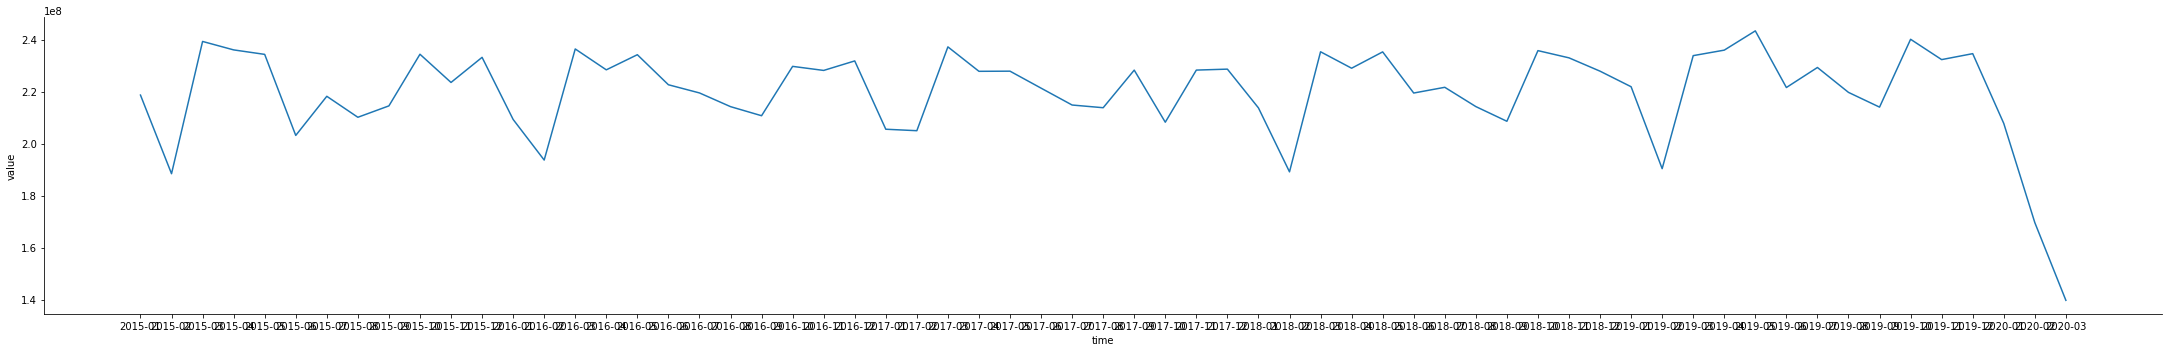

In [8]:
# 전체 데이터 plot
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
g = sns.relplot(x="time", y="value", kind="line", data=month_df, aspect=50/8.27)

In [9]:
# 년도별 데이터프레임 생성

monthes = 12

month_df_2015 = pd.DataFrame(dict(time=month_dates_list[:monthes],
                       value=month_passengers_list[:monthes]))
                       
month_df_2016 = pd.DataFrame(dict(time=month_dates_list[monthes:monthes*2],
                       value=month_passengers_list[monthes:monthes*2]))
month_df_2017 = pd.DataFrame(dict(time=month_dates_list[monthes*2:monthes*3],
                       value=month_passengers_list[monthes*2:monthes*3]))
month_df_2018 = pd.DataFrame(dict(time=month_dates_list[monthes*3:monthes*4],
                       value=month_passengers_list[monthes*3:monthes*4]))
month_df_2019 = pd.DataFrame(dict(time=month_dates_list[monthes*4:monthes*5],
                       value=month_passengers_list[monthes*4:monthes*5]))
month_df_2020 = pd.DataFrame(dict(time=month_dates_list[monthes*5:],
                       value=month_passengers_list[monthes*5:]))

month_df_years = [month_df_2015, month_df_2016, month_df_2017, month_df_2018, month_df_2019, month_df_2020]

In [10]:
# 시간과 이용객 수에 대한 변수 설정
X_2015, Y_2015 = np.array(month_df_years[0]['time']), np.array(month_df_years[0]['value'])
X_2016, Y_2016 = np.array(month_df_years[1]['time']), np.array(month_df_years[1]['value'])
X_2017, Y_2017 = np.array(month_df_years[2]['time']), np.array(month_df_years[2]['value'])
X_2018, Y_2018 = np.array(month_df_years[3]['time']), np.array(month_df_years[3]['value'])
X_2019, Y_2019 = np.array(month_df_years[4]['time']), np.array(month_df_years[4]['value'])
X_2020, Y_2020 = np.array(month_df_years[5]['time']), np.array(month_df_years[5]['value'])

X = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

(100000000.0, 250000000.0)

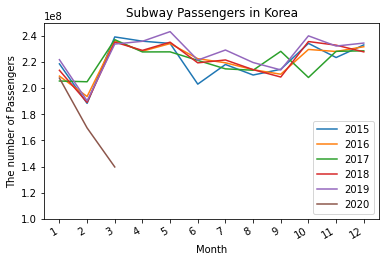

In [11]:
# 년도별 데이터 plot
plt.plot(X, Y_2015, label='2015')
plt.plot(X, Y_2016, label='2016')
plt.plot(X, Y_2017, label='2017')
plt.plot(X, Y_2018, label='2018')
plt.plot(X, Y_2019, label='2019')
plt.plot([X[0],X[1],X[2]], Y_2020, label='2020')
plt.title("Subway Passengers in Korea")
plt.xlabel("Month")
plt.ylabel("The number of Passengers")
plt.legend()
plt.gcf().autofmt_xdate()
plt.ylim(100000000,250000000)

(100000000.0, 250000000.0)

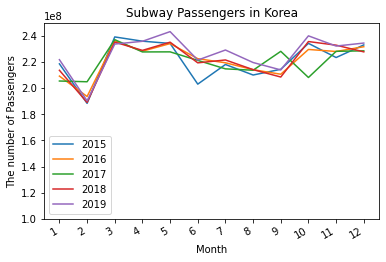

In [12]:
# 2020년도를 제외한 plot
plt.plot(X, Y_2015, label='2015')
plt.plot(X, Y_2016, label='2016')
plt.plot(X, Y_2017, label='2017')
plt.plot(X, Y_2018, label='2018')
plt.plot(X, Y_2019, label='2019')
plt.title("Subway Passengers in Korea")
plt.xlabel("Month")
plt.ylabel("The number of Passengers")
plt.legend()
plt.gcf().autofmt_xdate()
plt.ylim(100000000,250000000)

(140000000.0, 250000000.0)

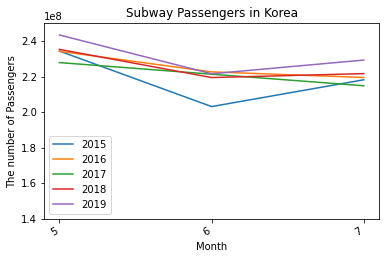

In [13]:
# MERS-CoV 기간 plot
plt.plot([X[4],X[5],X[6]], [Y_2015[4], Y_2015[5], Y_2015[6]] , label='2015')
plt.plot([X[4],X[5],X[6]], [Y_2016[4], Y_2016[5], Y_2016[6]], label='2016')
plt.plot([X[4],X[5],X[6]], [Y_2017[4], Y_2017[5], Y_2017[6]], label='2017')
plt.plot([X[4],X[5],X[6]], [Y_2018[4], Y_2018[5], Y_2018[6]], label='2018')
plt.plot([X[4],X[5],X[6]], [Y_2019[4], Y_2019[5], Y_2019[6]], label='2019')
plt.title("Subway Passengers in Korea")
plt.xlabel("Month")
plt.ylabel("The number of Passengers")
plt.legend()
plt.gcf().autofmt_xdate()
plt.ylim(140000000,250000000)

(140000000.0, 250000000.0)

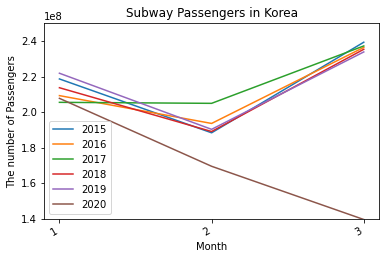

In [14]:
# COVID-19 기간 plot
plt.plot([X[0],X[1],X[2]], [Y_2015[0], Y_2015[1], Y_2015[2]] , label='2015')
plt.plot([X[0],X[1],X[2]], [Y_2016[0], Y_2016[1], Y_2016[2]], label='2016')
plt.plot([X[0],X[1],X[2]], [Y_2017[0], Y_2017[1], Y_2017[2]], label='2017')
plt.plot([X[0],X[1],X[2]], [Y_2018[0], Y_2018[1], Y_2018[2]], label='2018')
plt.plot([X[0],X[1],X[2]], [Y_2019[0], Y_2019[1], Y_2019[2]], label='2019')
plt.plot([X[0],X[1],X[2]], Y_2020, label='2020')
plt.title("Subway Passengers in Korea")
plt.xlabel("Month")
plt.ylabel("The number of Passengers")
plt.legend()
plt.gcf().autofmt_xdate()
plt.ylim(140000000,250000000)

-------------
# 지하철 데이터에 ARIMA 모델 적용

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

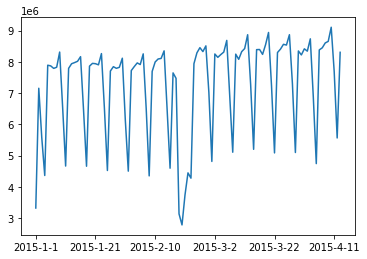

In [ ]:
data = pd.Series(passengers_list, index = dates_list)
data_ARIMA_cut = data.iloc[:103]
data_ARIMA_cut_float = data_ARIMA_cut[:].astype(np.float)
data_ARIMA_cut_float.plot()

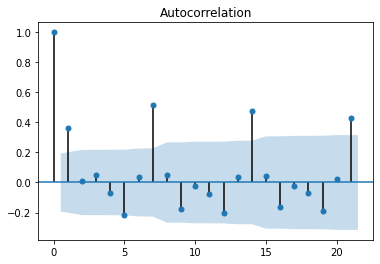

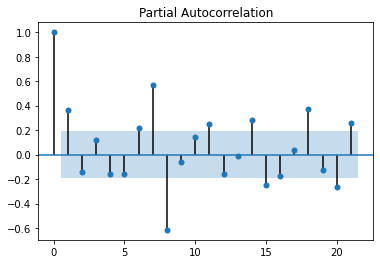

<Figure size 1440x288 with 0 Axes>

In [ ]:
plot_acf(data_ARIMA_cut_float)
plot_pacf(data_ARIMA_cut_float)
plt.figure(figsize=(20,4))
plt.show()

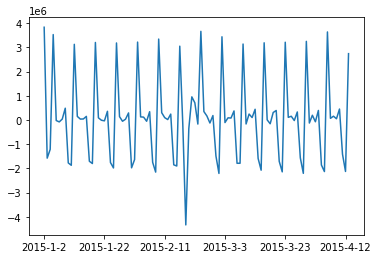

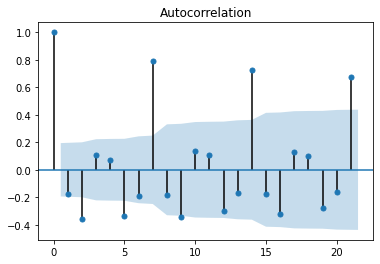

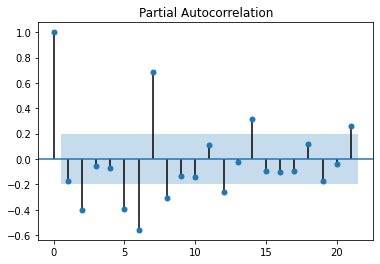

In [ ]:
diff_1 = data_ARIMA_cut_float.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [ ]:
model = ARIMA(data_ARIMA_cut_float, order=(4,0,4))
model_fit = model.fit(trend = 'c', full_output = True, disp=1)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  103
Model:                     ARMA(4, 4)   Log Likelihood               -1559.349
Method:                       css-mle   S.D. of innovations         839977.126
Date:                Thu, 30 Apr 2020   AIC                           3138.698
Time:                        10:47:02   BIC                           3165.045
Sample:                    01-01-2015   HQIC                          3149.369
                         - 04-13-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.264e+06   2.51e+05     28.929      0.000    6.77e+06    7.76e+06
ar.L1.y       -0.1605        nan        nan        nan         nan         nan
ar.L2.y       -0.9179    8.7e-05  -1.05e+04      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [ ]:
model = ARIMA(data_ARIMA_cut_float, order=(1,0,0))
model_fit = model.fit(trend = 'nc', full_output = True, disp=1)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  103
Model:                     ARMA(1, 0)   Log Likelihood               -1624.058
Method:                       css-mle   S.D. of innovations        1680381.924
Date:                Thu, 30 Apr 2020   AIC                           3252.115
Time:                        10:47:03   BIC                           3257.385
Sample:                    01-01-2015   HQIC                          3254.249
                         - 04-13-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9721      0.020     49.749      0.000       0.934       1.010
                                    Roots                                    
                  Real          Imaginary           M

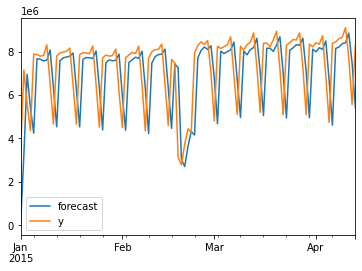

In [ ]:
model_fit.plot_predict()
plt.show()

In [ ]:
 fore = model_fit.forecast(steps = 1)
print(fore)

(8070813.2298851255, array([1680381.92432971]), array([[ 4777325.17792678, 11364301.28184347]]))


In [ ]:
data.iloc[104]

8528790